In [ ]:
!pip install bs4 requests pandas

해당 실습을 진행하기 위한 필수 파이썬 패키지 bs4(beautifulsoup4), requests, panadas 설치

In [39]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

#url = "https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d1174982-Reviews-or0-Tosokchon_Samgyetang-Seoul.html"
#headers = {'User-Agent': 'Mozilla/5.0'}

#html = requests.get(url,headers=headers) ##requests 를 이용해서 url의 html 파일을 가져옴
#soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

requests : 서버 측에 데이터를 요청하는데에 쓰일 패키지

BeautifulSoup : 웹 크롤링 관련 패키지

url : 수업에 쓰일 리뷰 데이터 예시

In [40]:
multi_page_result = list()
for i in range(0, 40, 10):
  url_str = "https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d1174982-Reviews-or"
  url_num = str(i)
  url_keyword = "-Tosokchon_Samgyetang-Seoul.html"

  total_url = url_str + url_num + url_keyword

  html = requests.get(total_url,headers=headers) ##requests 를 이용해서 url의 html 파일을 가져옴
  soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리


  html_label_list = soup.findAll("span", attrs={"ui_bubble_rating"})
  label_list = list()
  for line in html_label_list:
    label = line.attrs["class"][1]
    label_list.append(label)
    

  html_date_list = soup.findAll("span", attrs={"ratingDate"})
  date_list = list()
  for line in html_date_list:
    date = line.get_text()
    date_list.append(date)

  for label, date in zip(label_list, date_list):
    row_data = [label, date]
    multi_page_result.append(row_data)

여러 페이지의 리뷰를 받아오긴 위한 전체 코드

In [41]:
import pandas as pd
import numpy as np

df = pd.DataFrame(multi_page_result)
df.columns = ['Score', 'Date']
display(df)

,Score,Date
0,bubble_40,2020년 2월 12일에 작성.
1,bubble_45,2020년 1월 20일에 작성.
2,bubble_35,2020년 1월 16일에 작성.
3,bubble_35,2020년 1월 8일에 작성.
4,bubble_35,2019년 12월 8일에 작성.
5,bubble_40,2019년 10월 24일에 작성.
6,bubble_30,2019년 10월 24일에 작성.
7,bubble_40,2019년 10월 14일에 작성.
8,bubble_30,2019년 9월 25일에 작성.
9,bubble_30,2019년 9월 24일에 작성.


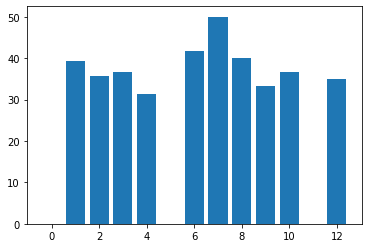

In [42]:
i = 0
df_n = len(df)
while i < df_n :
  df.Score[i]=df.loc[i,'Score'].split("_")[1]
  temp = df.loc[i, 'Date'].split("월")[0]
  df.Date[i] = temp.split(' ')[1]

  i = i+1

i = 0
df['Score_int'] = pd.to_numeric(df['Score'])
df['Date_int'] = pd.to_numeric(df['Date'])

month = np.zeros(13)
div = np.zeros(13)

while i <df_n :
  temp = df.Date_int[i]
  month[temp] += df.Score_int[i]
  div[temp] = div[temp]+1
  i = i+1
i = 0

while i < len(month) :
  temp = div[i]
  if temp > 1 :
    month[i]=month[i]/temp
  i=i+1
plt.bar(range(len(month)), month)
plt.show()

In [ ]:
display(df)

,Score,Date,User Review,Score_int,Date_int
0,40,2,국물이 엄청 진해요. 견과류도 같이 들어가서 고소하고 맛있어요.하지만 여름에는 .....,40,2
1,45,1,개인적으로는 고려나 백제 같은 정통파 삼계탕이 취향이지만 여기를 가야겠다는 일행이....,45,1
2,35,1,맛도 좋고 분위기에 몸보신에도 좋은 먹을거리삼계탕 하지만 너무 비싼 금액이 부담.....,35,1
3,35,1,일본사는 친구가 와서 친구가 이 식당에서 삼계탕을 먹고 싶다고 하더군요. 갔더니 ....,35,1
4,35,12,대통령이 다녀가고 또 해외 여러 잡지나 매체에 소개되면서 외국인들이 정말 많이 찾....,35,12
5,40,10,먼저 평일 점심 때는 되도록 피하세요. 단체 관광객들에다 근방의 직장인들로 넓은 ....,40,10
6,30,10,파전은 시키지 마세요 솔직히 별로네요. 삼계탕은 정말 맛있어요 누구든 데리고 와서....,30,10
7,40,10,삼계탕인데 추어탕 국물 맛이 느껴질 정도로 매우 진하고 깊은 국물맛이 일품.예전.....,40,10
8,30,9,서울에서 이런 맛의 삼계탕이라니!!경복궁 근처에 맛있는 삼계탕 집이 있다는언니......,30,9
9,30,9,줄 서서 먹어도 아깝지 않음.다만 서빙 등이 약간 불친절하긴 한데...맛있다는......,30,9


In [ ]:
"review_df.to_csv('trip.csv')

csv 형태의 파일로 저장하기 위한 기능

!ls

In [ ]:
!ls

drive  sample_data  trip.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
